In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('placement.csv')
#splitting dataset
train_data=data.iloc[:70]
test_data=data.iloc[70:]

In [3]:
#sigmoid function 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
def logistic_regression(X, y, lr=0.01, num_iter=1000):
    weights =np.zeros(X.shape[1])
    bias=0

In [84]:
def logistic_regression(X, y, lr=0.01, num_iter=1000):
    weights =np.zeros(X.shape[1])
    bias=0
    for i in range(num_iter):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)
        
        error = y_pred - y
        dw = np.dot(X.T, error) / len(y)
        db = np.sum(error) / len(y)
        
  
        update = lr * dw  
        weights = weights - update 
        
        update = lr * db  
        bias = bias - update 
    return weights, bias

In [85]:
#training data
X_train=train_data[['cgpa', 'resume_score']].values
y_train=train_data['placed'].values

weights, bias = logistic_regression(X_train, y_train)

print("Weights:", weights)
print("Bias:", bias)

Weights: [ 1.02025216 -0.91908176]
Bias: -0.3217446339603311


In [16]:
X_test=test_data[['cgpa', 'resume_score']].values
y_test=test_data['placed'].values

In [17]:
z_test =np.dot(X_test, weights) + bias
y_pred_test=sigmoid(z_test) >= 0.5

In [18]:
accuracy = np.mean(y_pred_test == y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7333333333333333


In [26]:
#mean and std for each class
def statistics(X, y):
    n_features=X.shape[1]
    classes=np.unique(y)
    mean=np.zeros((len(classes), n_features))
    std=np.zeros((len(classes), n_features))
    for i, c in enumerate(classes):
        X_c = X[y == c]
        mean[i, :] = X_c.mean(axis=0)
        std[i, :] = X_c.std(axis=0)
    return classes, mean, std

In [86]:
classes, mean, std=statistics(X_train, y_train)

In [71]:
for i, class_value in enumerate(classes):
    print(f"Class {class_value}:")
    print("Mean:", mean[i])
    print("Standard deviation:", std[i])

Class 0:
Mean: [5.98705882 6.965     ]
Standard deviation: [0.32138972 0.86134727]
Class 1:
Mean: [7.90166667 7.11305556]
Standard deviation: [0.65726918 1.03874074]


In [36]:
def gaussian_pdf(X, mean, std):
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((X - mean) / std) ** 2)

In [73]:
#Naive Bayes classifier using Gaussian distributions
def naive_bayes_classifier(X, classes, mean, std):
    n_classes=len(classes)
    n_features=X.shape[1]
    likelihoods= np.zeros((X.shape[0], n_classes))

    for i in range(n_classes):
        likelihood=gaussian_pdf(X[:, 0], mean[i, 0], std[i, 0])
        for j in range(1, n_features):
            likelihood *= gaussian_pdf(X[:, j], mean[i, j], std[i, j])
        likelihoods[:, i] = likelihood

    y_pred = np.argmax(likelihoods, axis=1)

    return y_pred


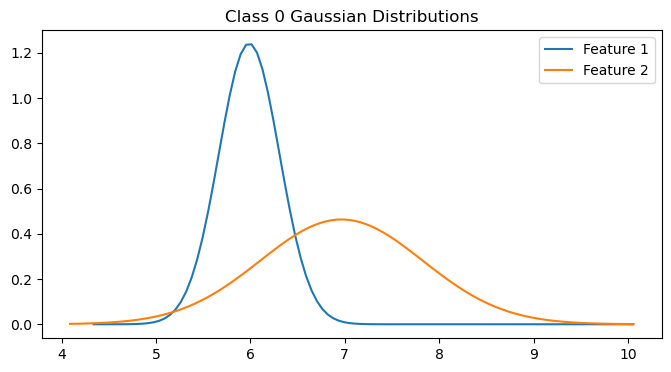

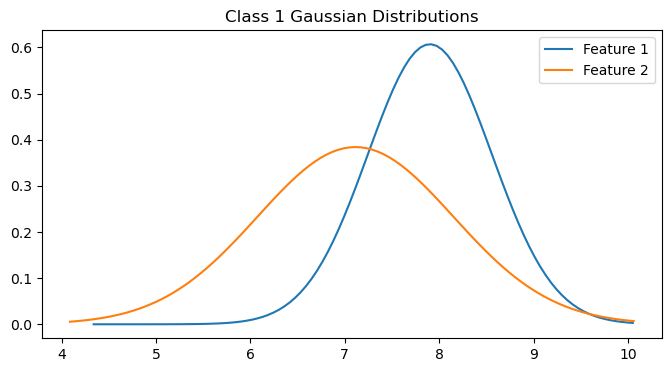

In [74]:
for i, class_value in enumerate(classes):
    plt.figure(figsize=(8, 4))
    for j in range(mean.shape[1]):
        x = np.linspace(min(X_train[:, j]) - 1, max(X_train[:, j]) + 1, 100)
        p = gaussian_pdf(x, mean[i, j], std[i, j])
        plt.plot(x, p, label=f'Feature {j + 1}')
    plt.title(f'Class {class_value} Gaussian Distributions')
    plt.legend()
    plt.show()

In [87]:
#accuracy
y_pred_nb = naive_bayes_classifier(X_test, classes, mean, std)
accuracy_nb = np.mean(y_pred_nb==y_test)
print("Test accuracy:", accuracy_nb)

Test accuracy: 0.9333333333333333


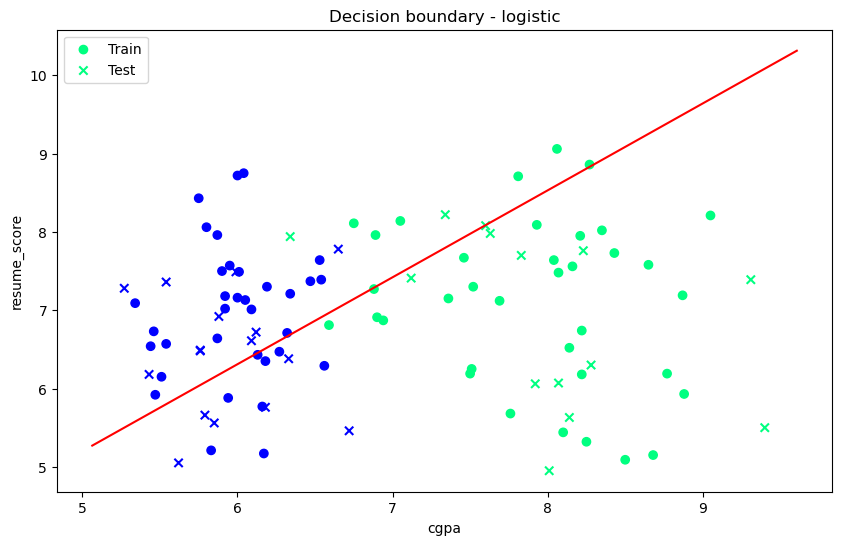

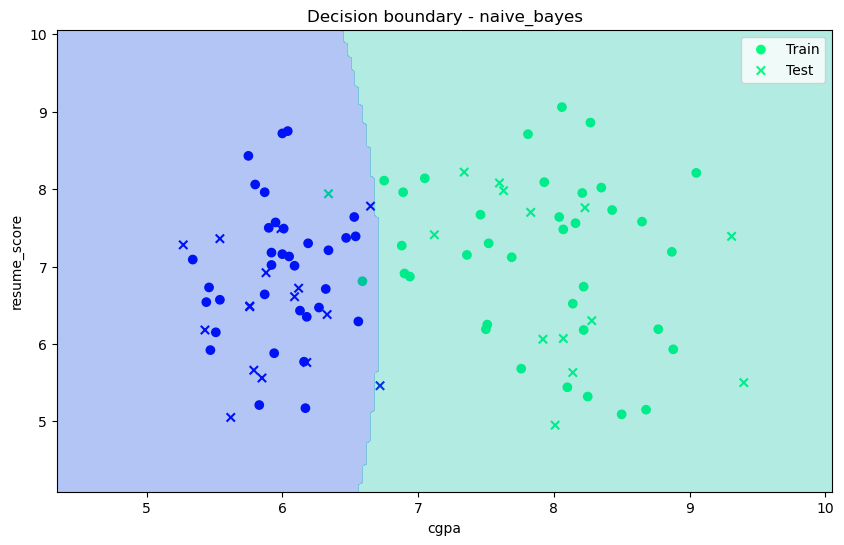

In [88]:
def plot_decision_boundary(X_train, y_train, X_test, y_test, classifier, weights=None, bias=None, mean=None, std=None, classes=None):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter', marker='o', label='Train')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='winter', marker='x', label='Test')

    if classifier == 'logistic':
        ax = plt.gca()
        x_vals = np.array(ax.get_xlim())
        y_vals = -(x_vals * weights[0] + bias) / weights[1]
        plt.plot(x_vals, y_vals, 'r')
    
    elif classifier == 'naive_bayes':
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
        grid = np.c_[xx.ravel(), yy.ravel()]
        Z = naive_bayes_classifier(grid, classes, mean, std)
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(len(classes) + 1) - 0.5, cmap='winter')
        
    plt.xlabel('cgpa')
    plt.ylabel('resume_score')
    plt.legend()
    plt.title(f'Decision boundary - {classifier}')
    plt.show()

plot_decision_boundary(X_train, y_train, X_test, y_test, 'logistic', weights=weights, bias=bias)
plot_decision_boundary(X_train, y_train, X_test, y_test, 'naive_bayes', mean=mean, std=std, classes=classes)
